# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Propriedades-da-Convolução" data-toc-modified-id="Propriedades-da-Convolução-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Propriedades da Convolução</a></div><div class="lev2 toc-item"><a href="#Translação-por-um-impulso" data-toc-modified-id="Translação-por-um-impulso-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Translação por um impulso</a></div><div class="lev2 toc-item"><a href="#Resposta-ao-impulso" data-toc-modified-id="Resposta-ao-impulso-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Resposta ao impulso</a></div><div class="lev2 toc-item"><a href="#Decomposição" data-toc-modified-id="Decomposição-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Decomposição</a></div><div class="lev3 toc-item"><a href="#Visualizando-as-imagens:" data-toc-modified-id="Visualizando-as-imagens:-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Visualizando as imagens:</a></div>

# Propriedades da Convolução

A convolução possui várias propriedades que são úteis tanto para o melhor entendimento
do seu funcionamento como de uso prático. Aqui são ilustradas três propriedades: translação
por impulso, resposta ao impulso e decomposição do núcleo da convolução.

In [2]:
# importando a função a ser utilizada nesse tutorial
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Translação por um impulso

Quando o núcleo da composição é composto de apenas um único valor um e os demais zeros, a
imagem resultante será a translação da imagem original pelas coordenadas do valor não zero do núcleo.
No exemplo a seguir, o núcleo da convolução consiste do valor 1 na coordenada (19,59). Assim, a imagem
resultante ficara deslocada de 19 pixels para baixo e 59 para a direita. Observe que como estamos
tratando as imagens como infinitas com valores zeros fora do retângulo da imagem, esta translação faz
com que o retângulo da imagem aumente e vários valores iguais a zero sejam agora visíveis.

""
entrada
""
"entrada translada de (20,60)"

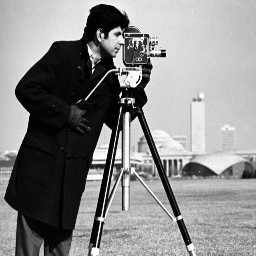
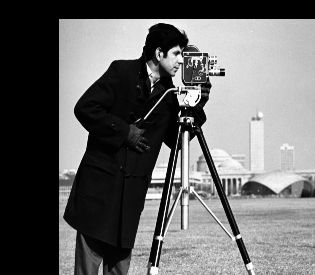

In [10]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
os.chdir('../data')
f = mpimg.imread('cameraman.tif')

h = np.zeros((20,60)) 
h[19,59] = 1 
nb = ia.nbshow(3)
nb.nbshow(f,'entrada') 
g = ia.conv(f,h) 
nb.nbshow(g.astype(np.uint8),'entrada translada de (20,60)')
nb.nbshow()


## Resposta ao impulso
Quando a imagem é formada por um único pixel de valor 1, o resultado da convolução é o núcleo da convolução. Esta propriedade permite que se visualize o núcleo da convolução. Se você souber que existe algum software que possui um filtro linear invariante à translação e você não sabe qual é o seu núcleo, basta aplicá-lo numa imagem com um único pixel igual a 1. O resultado do filtro revelará o seu núcleo. Na ilustração a seguir, uma imagem com vários impulsos é criada. Após aplicar a convolução com um filtro qualquer, é possível visualizar o núcleo sendo repetido em cada lugar do impulso.

In [6]:
import numpy as np


#gerando imagem com pulsos
# 1 pulso a cada 4 linhas e 4 colunas
f = np.zeros((4,4))
f[3,3]= 1
f = np.tile(f,(2,2))
print('Matriz com impulsos:\n',f)

#gerando  filtro
h = np.array([ [1,2,3],[4,5,6],[7,8,9]])
print('\nNucleo do Filtro:\n',h)

g = ia.conv(f,h)
print('\nVisualização do núcleo após aplicar o fitro sobre a matriz com pulsos:\n',g)






Matriz com impulsos:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.]]

Nucleo do Filtro:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Visualização do núcleo após aplicar o fitro sobre a matriz com pulsos:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  1.  2.  3.]
 [ 0.  0.  0.  4.  5.  6.  0.  4.  5.  6.]
 [ 0.  0.  0.  7.  8.  9.  0.  7.  8.  9.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  1.  2.  3.]
 [ 0.  0.  0.  4.  5.  6.  0.  4.  5.  6.]
 [ 0.  0.  0.  7.  8.  9.  0.  7.  8.  9.]]


Aplicando a resposta ao impulso numa imagem real para ilustrar o seu comportamento


""
imagem original
""
nucleo
""
resposta ao impulso

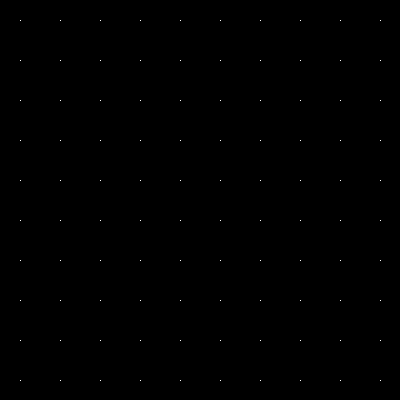
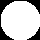
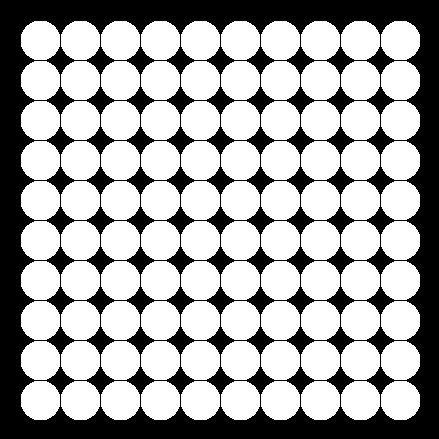

In [12]:
import numpy as np

print('Aplicando a resposta ao impulso numa imagem real para ilustrar o seu comportamento')

#gerando imagem com pulsos
f = np.zeros((40,40))
f[20,20]= 1
f = np.tile(f,(10,10))
f = ia.normalize(f)
nb.nbshow(f, 'imagem original')

#gerando  filtro - circulo de raio 50
r,c = np.indices( (40, 40) )
h = ((r-20)**2 + (c-20)**2 < 20**2)
h = ia.normalize(h)
nb.nbshow(h, 'nucleo')

g = ia.conv(f,h)


nb.nbshow(ia.normalize(g), 'resposta ao impulso')
nb.nbshow()

## Decomposição
A propriedade da associatividade da convolução é dada por:

\begin{align}
f*h_{eq} = f*(h1*h2) = (f*h1)*h2
\end{align}

Se conseguirmos decompor um núcleo de modo que ele seja o resultado da convolução de dois núcleos mais simples, esta propriedade permite um ganho computacional se a convolução for aplicada por cada núcleo separadamente. A seguir é ilustrado o caso do núcleo que faz a soma dos pixels numa janela quadrada de 10 pixels de lado. Se a convolução for feita com o quadrado 10 x 10, serão 100 operações feitas na convolução. Se o núcleo for decomposto em dois núcleos uma linha e uma coluna de 10 pixels cada, cada convolução precisará de 10 operações, totalizando 20 operações ao todo. Observe a diferença no tempo de processamento destes dois casos.

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
os.chdir('../data')
f = mpimg.imread('cameraman.tif')

h1 = np.ones((1,10))
h2 = np.ones((10,1))
   
h = ia.conv(h1,h2)
print('Nucleo original h=\n',h)
print('\nTempo de processamento 10 x 10:')
%timeit ia.conv(f,h)

f2 = ia.conv(f,h1)
print('\nNucleo decomposto\nh1=\n',h1,'\nh2=\n',h2)
print('\nTempo de processamento 10 horizontal e 10 vertical:')
%timeit ia.conv(f,h1), ia.conv(f2,h2)

Note a grande diferença no tempo de execução com o nucleo original e com o nucleo separado

### Visualizando as imagens:

""
filtragem pela soma na janela 10x10 (f1)
""
filtragem pela soma na janela 10 horizontal e 10 vertical separadas (f3)

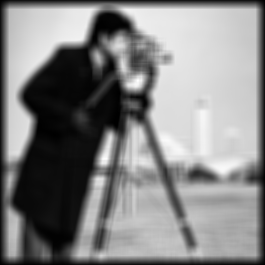
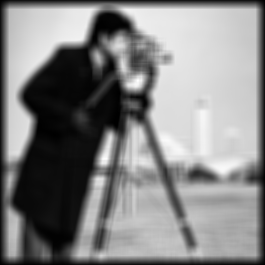

f1 é igual f3?
Maxima diferença entre f1 e f3: 0.0


In [15]:
f1 = ia.conv(f,h)
f3= ia.conv(f2,h2)
nb.nbshow(ia.normalize(f1), 'filtragem pela soma na janela 10x10 (f1)')
nb.nbshow(ia.normalize(f3), 'filtragem pela soma na janela 10 horizontal e 10 vertical separadas (f3)')
nb.nbshow()
print('f1 é igual f3?\nMaxima diferença entre f1 e f3:', np.max(np.abs(f1-f3)) )